# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


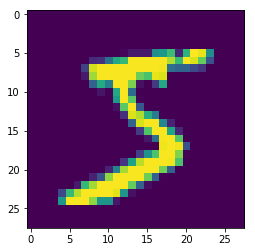

In [113]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [116]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [118]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [119]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())

model.add(Convolution2D(20, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykerne

In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_40 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_18 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_41 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_19 (Dropout)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 22, 22, 20)        1820      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [122]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.2111 - acc: 0.9334
Epoch 2/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0714 - acc: 0.9776
Epoch 3/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0565 - acc: 0.9825
Epoch 4/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0497 - acc: 0.9845
Epoch 5/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0443 - acc: 0.9860
Epoch 6/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0403 - acc: 0.9874
Epoch 7/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.0379 - acc: 0.9880
Epoch 8/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.0359 - acc: 0.9888
Epoch 9/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.0339 - acc: 0.9890
Epoch 10/10
60000/60000 [==============================] - 22s 362us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [130]:
print(score)

[0.03022451134098228, 0.9906]


In [0]:
y_pred = model.predict(X_test)

In [126]:
print(y_pred[:9])
print(y_test[:9])

[[5.57145163e-10 1.21927218e-10 3.20310072e-08 9.04985598e-08
  2.49059044e-14 3.15720676e-13 6.09271070e-14 9.99999881e-01
  1.49271012e-10 3.24331886e-08]
 [5.16828659e-05 6.70915033e-05 9.99826491e-01 8.16965606e-09
  4.02809164e-09 8.28819735e-10 5.47136988e-05 6.60714261e-11
  1.31856535e-08 1.21616130e-08]
 [2.04087485e-07 9.99991775e-01 8.77657200e-08 1.29492165e-07
  3.18704747e-06 1.12125875e-07 2.89183191e-07 2.98560258e-06
  7.36453615e-07 4.74773827e-07]
 [9.99969959e-01 3.55630358e-10 9.55050368e-08 4.11823198e-09
  4.48229059e-07 1.93544679e-07 1.84870896e-05 2.74017947e-10
  2.14712628e-07 1.06578636e-05]
 [4.35752545e-10 4.23919317e-08 1.77449366e-09 1.44702514e-11
  9.99983788e-01 2.32282492e-11 1.74538395e-09 2.97520980e-10
  9.77925740e-10 1.62142787e-05]
 [2.23217739e-07 9.99989271e-01 7.31411234e-08 2.02669046e-08
  3.17467175e-06 1.16687779e-08 3.67566116e-07 5.22715072e-06
  8.82266704e-07 7.13427426e-07]
 [7.13389070e-11 1.68279098e-06 1.25566118e-08 3.99830689e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [128]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored